# Ecommerce Logistics Analysis, Part 2
### 1. How accurate is Olist’s shipment delivery estimation system?


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from table_audit import table_audit_function

%matplotlib inline

#Create context manager to handle connection to SQLite database and return dataframe from query
def run_query(q):
    with sqlite3.connect('data/ecommerce.db') as conn:
        return pd.read_sql_query(q,conn)

Below is a schema summarizing the relationships between the tables in the database I created in Part 1
![title](images/schema_rearranged_2.JPG)


Change order_delivered_carrier to ordered_delivered_carrier_date

### Missing values investigation

In Part 2, dealing exclusively w/ data in the orders_modified table.

In [2]:
q1 = '''
SELECT *
FROM orders_modified
'''

q1_df = run_query(q1)
table_audit_function(q1_df)

There are no null values in any of the columns for this table.
There are 14 blank values in the field order_approved_at
There are 992 blank values in the field order_delivered_carrier
There are 2152 blank values in the field order_delivered_customer_date


In [3]:
q1_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
5,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,2017-06-06 00:00:00
6,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,2017-12-10 12:10:31,2017-12-12 01:07:48,2017-12-18 22:03:38,2018-01-04 00:00:00
7,000576fe39319847cbb9d288c5617fa6,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,2018-07-05 16:35:48,2018-07-05 12:15:00,2018-07-09 14:04:07,2018-07-25 00:00:00
8,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,2018-03-20 18:35:21,2018-03-28 00:37:42,2018-03-29 18:17:31,2018-03-29 00:00:00
9,0005f50442cb953dcd1d21e1fb923495,351d3cb2cee3c7fd0af6616c82df21d3,delivered,2018-07-02 13:59:39,2018-07-02 14:10:56,2018-07-03 14:25:00,2018-07-04 17:28:31,2018-07-23 00:00:00


In [4]:
order_status_list = q1_df['order_status'].unique()
order_status_count = {}
for index, value in enumerate(order_status_list):
        order_status_count[order_status_list[index]] = len(q1_df[q1_df['order_status']==value])

print(order_status_count)

# Include 'delivered' (obviously)
# 'shipped' = never arrived (dataset was posted Feb 2019 so assuming the dataset was current to then, these shipments have been in limbo at the very least for ~4 months, in most cases much more)
# 'canceled' doesn't provide much info b/c we dont know why the order was canceled (or when). Was it canceled b/c the shipment was taking too long? Or was it canceled simply b/c the customer no longer wanted the product?
# 'invoiced' = ?
# 'processing' = ?
# 'approved' = ?
# 'unavailable' = ?

{'delivered': 93281, 'shipped': 1085, 'canceled': 457, 'invoiced': 304, 'processing': 296, 'approved': 2, 'unavailable': 5}


In [5]:
# 14 missing 'order_approved_at' values. 
#1
q1_df_1 = q1_df[q1_df['order_approved_at']=='']
q1_df_1

#2
q1_df_2 = q1_df[q1_df['order_delivered_carrier']=='']


#3
q1_df_3 = q1_df[q1_df['order_delivered_customer_date']=='']


In [6]:
q1_df_1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier,order_delivered_customer_date,order_estimated_delivery_date
6997,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
16165,2babbb4b15e6d2dfe95e2de765c97bce,74bebaf46603f9340e3b50c6b086f992,delivered,2017-02-18 17:15:03,,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31 00:00:00
17408,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00
22363,3c0b8706b065f9919d0505d3b3343881,d85919cb3c0529589c6fa617f5f43281,delivered,2017-02-17 15:53:27,,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23 00:00:00
30563,51eb2eebd5d76a24625b31c33dd41449,07a2a7e0f63fd8cb757ed77d4245623c,delivered,2017-02-18 15:52:27,,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29 00:00:00
34548,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
41765,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
41786,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
50526,88083e8f64d95b932164187484d90212,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21 00:00:00
51493,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00


In [7]:
q1_df_2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier,order_delivered_customer_date,order_estimated_delivery_date
75,00310b0c75bb13015ec4d82d341865a4,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,,,2018-08-29 00:00:00
239,00ae7a8b4936674ebb701d4a23719a79,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,,,2018-05-17 00:00:00
368,00ff0cf5583758e6964723e42f111bf4,e3626ed5d1f2e3a02d692ec948b25eeb,canceled,2017-04-10 00:45:56,2017-04-10 01:03:29,,,2017-05-04 00:00:00
468,013e9c654a339d80b53513da3c1ea437,9391729f79cd9e5fd7ca884ca030f579,canceled,2017-06-18 13:48:48,2017-06-18 13:55:18,,,2017-07-07 00:00:00
477,0148d3df00cebda592d4e5f966e300cc,672510553bcfbf72de694db2cd88f046,canceled,2017-08-19 19:08:26,2017-08-19 19:24:32,,,2017-09-11 00:00:00
502,015fb6b5f739788434fa690540f90f19,eca9b206f2a9e4693bf0840895434e2c,invoiced,2017-01-31 13:06:05,2017-02-02 02:41:22,,,2017-03-09 00:00:00
577,0197416059c0e56b5344bf2188066317,bc0a84ea7543ac13807feccb5bfccf4b,canceled,2018-07-26 17:20:23,2018-07-26 17:30:19,,,2018-08-23 00:00:00
782,021dac6e3120485db6a77474aa21b979,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,,,2017-12-15 00:00:00
976,02a0eb7c22b0616c767a45954a2a28f6,43d9a8df81f815755d9a258f2ee3135f,invoiced,2016-10-09 10:34:58,2016-10-10 08:14:52,,,2016-12-12 00:00:00
1249,035b790fa740b68de2d6f1a74f9b2098,30a09a314fcba2f8ddb8334844953702,invoiced,2018-03-25 18:27:09,2018-03-25 18:48:01,,,2018-04-06 00:00:00


In [8]:
q1_df_3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier,order_delivered_customer_date,order_estimated_delivery_date
72,002f19a65a2ddd70a090297872e6d64e,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,,2018-04-16 00:00:00
75,00310b0c75bb13015ec4d82d341865a4,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,,,2018-08-29 00:00:00
229,00a99c50fdff7e36262caba33821875a,7a399396442d5601cbedfbd0a3cf1da4,shipped,2018-08-17 16:25:04,2018-08-17 16:35:18,2018-08-18 09:07:00,,2018-09-18 00:00:00
239,00ae7a8b4936674ebb701d4a23719a79,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,,,2018-05-17 00:00:00
368,00ff0cf5583758e6964723e42f111bf4,e3626ed5d1f2e3a02d692ec948b25eeb,canceled,2017-04-10 00:45:56,2017-04-10 01:03:29,,,2017-05-04 00:00:00
468,013e9c654a339d80b53513da3c1ea437,9391729f79cd9e5fd7ca884ca030f579,canceled,2017-06-18 13:48:48,2017-06-18 13:55:18,,,2017-07-07 00:00:00
475,01443cd06ea8bce82c554a46f307459f,7995a0161ac789e3a05607de1620d517,shipped,2018-01-03 10:43:02,2018-01-04 14:32:48,2018-01-05 17:35:19,,2018-02-01 00:00:00
477,0148d3df00cebda592d4e5f966e300cc,672510553bcfbf72de694db2cd88f046,canceled,2017-08-19 19:08:26,2017-08-19 19:24:32,,,2017-09-11 00:00:00
502,015fb6b5f739788434fa690540f90f19,eca9b206f2a9e4693bf0840895434e2c,invoiced,2017-01-31 13:06:05,2017-02-02 02:41:22,,,2017-03-09 00:00:00
511,0166cc8756d58b4a30fb49de83527120,19e9dac43eee8df98092482fdce676da,canceled,2018-02-08 21:09:18,2018-02-08 21:27:56,2018-02-09 23:12:30,,2018-02-22 00:00:00


In [9]:
q1_df_4 = q1_df[q1_df['order_status']=='shipped']

q1_df_4

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier,order_delivered_customer_date,order_estimated_delivery_date
72,002f19a65a2ddd70a090297872e6d64e,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,,2018-04-16 00:00:00
229,00a99c50fdff7e36262caba33821875a,7a399396442d5601cbedfbd0a3cf1da4,shipped,2018-08-17 16:25:04,2018-08-17 16:35:18,2018-08-18 09:07:00,,2018-09-18 00:00:00
475,01443cd06ea8bce82c554a46f307459f,7995a0161ac789e3a05607de1620d517,shipped,2018-01-03 10:43:02,2018-01-04 14:32:48,2018-01-05 17:35:19,,2018-02-01 00:00:00
549,017c9c82265e832840e4209750680e94,1ff23faa252154298c3e52a1e36c1cda,shipped,2018-03-05 18:13:17,2018-03-05 19:00:26,2018-03-08 01:26:56,,2018-03-26 00:00:00
917,027b013d2186e25c2b82beb3679d0833,752b19f57cd013e2bf4e3c62da5a29e5,shipped,2018-04-11 15:49:16,2018-04-11 16:10:51,2018-04-13 20:05:02,,2018-05-02 00:00:00
1010,02b9fd867657f257dc634a2e7e0f73c5,a96b4cca295b6876489ce885ca6b9f10,shipped,2017-06-10 12:16:30,2017-06-11 06:42:47,2017-06-22 07:47:49,,2017-07-17 00:00:00
1074,02ea547b6d2ee25305588fd50df58b46,ff4545a3148f5a22667f301e00cb5ad7,shipped,2017-03-23 22:03:43,2017-03-23 22:10:24,2017-03-28 11:43:01,,2017-04-18 00:00:00
1079,02ec4da9d03014f06d711d60eb37cc22,79e6d859cf83e9bf76a07629ca91a49c,shipped,2017-04-28 12:32:56,2017-04-28 13:05:49,2017-05-11 11:12:57,,2017-05-24 00:00:00
1088,02f30be57375dc610c40ca989d2385b7,a18c76193a26ef37fd582877922447c7,shipped,2017-11-27 18:25:55,2017-11-28 03:21:19,2017-11-29 20:03:26,,2017-12-11 00:00:00
1132,03138c298bfe1ee7855eefc9442346a8,462025be11ad81e8138837f833b827c9,shipped,2018-06-15 16:07:24,2018-06-16 08:58:53,2018-06-18 14:41:00,,2018-07-13 00:00:00


In [10]:
q2 = '''
SELECT *
FROM orders_modified
WHERE order_status='delivered'
'''



q2_df = run_query(q2)
print(len(q2_df))
table_audit_function(q2_df)

q2_df_1 = q2_df[q2_df['order_approved_at']=='']


#2
q2_df_2 = q2_df[q2_df['order_delivered_carrier']=='']


#3
q2_df_3 = q2_df[q2_df['order_delivered_customer_date']=='']

93281
There are no null values in any of the columns for this table.
There are 14 blank values in the field order_approved_at
There are 2 blank values in the field order_delivered_carrier
There are 8 blank values in the field order_delivered_customer_date


In [11]:
q2_df_1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier,order_delivered_customer_date,order_estimated_delivery_date
6864,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
15818,2babbb4b15e6d2dfe95e2de765c97bce,74bebaf46603f9340e3b50c6b086f992,delivered,2017-02-18 17:15:03,,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31 00:00:00
17026,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00
21869,3c0b8706b065f9919d0505d3b3343881,d85919cb3c0529589c6fa617f5f43281,delivered,2017-02-17 15:53:27,,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23 00:00:00
29887,51eb2eebd5d76a24625b31c33dd41449,07a2a7e0f63fd8cb757ed77d4245623c,delivered,2017-02-18 15:52:27,,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29 00:00:00
33775,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
40821,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
40842,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
49399,88083e8f64d95b932164187484d90212,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21 00:00:00
50344,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00


In [12]:
q2_df_2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier,order_delivered_customer_date,order_estimated_delivery_date
15451,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,,2017-11-20 19:44:47,2017-11-14 00:00:00
16501,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,,,2017-06-23 00:00:00


In [13]:
q2_df_3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier,order_delivered_customer_date,order_estimated_delivery_date
4871,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,,2018-07-24 00:00:00
12012,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,,2018-07-19 00:00:00
16335,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,,2017-12-18 00:00:00
16501,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,,,2017-06-23 00:00:00
16956,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,,2018-07-30 00:00:00
62299,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,,2018-06-26 00:00:00
84146,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,,2018-07-30 00:00:00
89560,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,,2018-07-16 00:00:00


Will only work w/ shipments that are actually delivered in this analysis (93,281/95,430 of the orders are 'delivered').
Another interesting angle for analysis would be to look at orders that were never delivered. 

Will drop the remaining 24 records that have missing date values. 

I made the following view b/c I use it several times for my analysis:
![title](images/delivery_difference_3.JPG)

In [14]:
q3 = '''
SELECT * 
FROM delivery_difference
'''

In [15]:
table_audit_function(run_query(q3))

There are no null values in any of the columns for this table.
There are no blank values in any of the columns for this table.


### End of missing values investigation

In [16]:
q4 = '''
SELECT 
    MIN(delivery_estimate_difference) latest,
    MAX(delivery_estimate_difference) earlierst,
    AVG(delivery_estimate_difference) mean_difference
FROM delivery_difference
'''

run_query(q4)

,latest,earlierst,mean_difference
0,-188.975081,146.016123,11.088851


In [17]:
q5 = '''
SELECT 
    delivery_estimate_difference median_difference
FROM delivery_difference
LIMIT 1
OFFSET (SELECT COUNT(*) FROM delivery_difference)/2

'''

run_query(q5)

,median_difference
0,11.524514


In [18]:
q6 = '''
SELECT COUNT(*) outliers
FROM delivery_difference
WHERE delivery_estimate_difference > 30 OR delivery_estimate_difference<-30
'''

run_query(q6)

,outliers
0,2564


In [19]:
q7 = '''
SELECT 
    COUNT(*) late_shipments,
    (CAST(COUNT(*) AS real) / (SELECT COUNT(*) FROM delivery_difference))*100 percent_late_shipments
FROM delivery_difference
WHERE delivery_estimate_difference < -1
'''

run_query(q7)

,late_shipments,percent_late_shipments
0,6411,6.874477


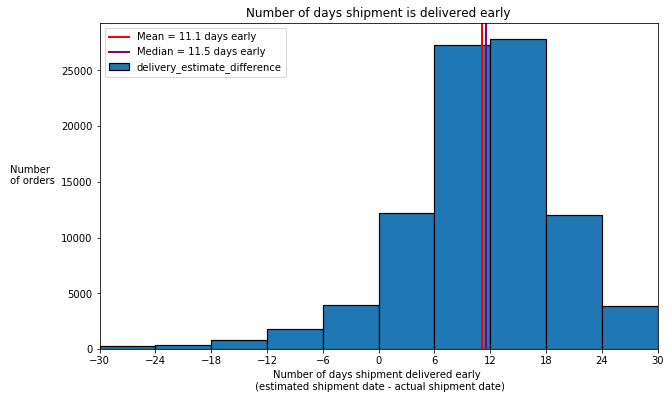

In [20]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)


df_diff = run_query(q3)

#Histogram
ax1.hist(df_diff['delivery_estimate_difference'], range=(-30,30), bins=10, edgecolor='black', linewidth=1.2)

mean_diff = run_query(q4).iloc[0,2]
median_diff = run_query(q5).iloc[0,0]
ax1.axvline(x=mean_diff,c='red',label='Mean = ' + str(round(mean_diff,1)) + ' days early', linewidth=2)
ax1.axvline(x=median_diff,c='purple',label='Median = ' + str(round(median_diff,1)) + ' days early', linewidth=2)
ax1.set_ylabel('Number \n of orders',rotation=0, labelpad=30)
ax1.set_xlabel('Number of days shipment delivered early \n (estimated shipment date - actual shipment date)')
ax1.set_title('Number of days shipment is delivered early')
ax1.set_xticks([-30,-24,-18,-12,-6,0,6,12,18,24,30])
ax1.set_xlim(-30,30)
ax1.legend()

plt.show()

Zoomed in, excluding outliers (2564 shipments were delivered >30 days early or >30 days late) so that the histogram can effectively visualize distribution of shipment delivery performance. <br>
The distribution is pretty symmetrical (slightly negative-skewed).

Insights/Recommendations:
1. Olist typically does a good job of giving conservative delivery estimates to their customers. (Only 6411 shipments were later than the estimate (6.9% of shipments).
2. Olist on average delivers their shipments ~11 days earlier than the estimate that they give to their customers. Perhaps they should investigate further ways to give more accurate shipment estimates.

In [21]:
q8 = '''
WITH intermed_table AS
    (
    SELECT
        v.order_id,
        CASE
            WHEN v.delivery_estimate_difference < -1 THEN "Late delivery"
            WHEN v.delivery_estimate_difference  >= -1 AND v.delivery_estimate_difference <= 0 THEN "On time"
            WHEN v.delivery_estimate_difference  > 0 THEN "Early delivery"
            END
            AS delivery_status
    FROM delivery_difference v
    ORDER BY 2 DESC
    )
    
SELECT
    COUNT(order_id) number_of_orders,
    delivery_status
FROM intermed_table
GROUP BY delivery_status
'''

run_query(q8)

,number_of_orders,delivery_status
0,85588,Early delivery
1,6411,Late delivery
2,1259,On time


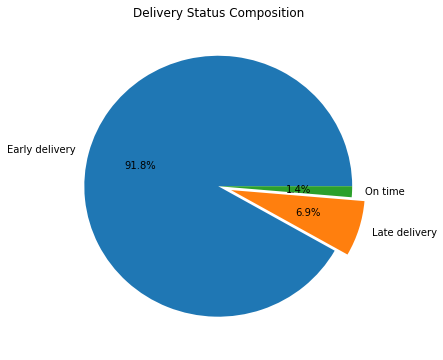

In [22]:
delivery_status_compostion = run_query(q8)

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)


ax1.pie(x=delivery_status_compostion['number_of_orders'], labels=delivery_status_compostion['delivery_status'], autopct='%1.1f%%', explode=(0,0.1,0))
ax1.set_title("Delivery Status Composition")

plt.show()

Olist's delivery estimation system is not very accurate: Only 1.4% of the shipments had a shipment estimation that correctly predicted the actual delivery date. <br>
Olist's delivery estimation system is conservative: The vast majority (91.8%) of shipments were actually delivered earlier than the estimated date given to the customer. <br>
6.9% of the shipments were delivered later than the estimated date.   

Olist should look into ways to more accurately predict the estimated delivery date. It appears that the current system involves a lot of guess-work and consequently they must give very conservative estimates (shipments on average are delivered 11 days earlier than the estimate given to the customer) to reduce the number of late shipments (6.9% of the shipments are late, which seems pretty high, considering). 